# Titanic - part I - getting basis understanding who survived with Seaborn

In [2]:
# importing main liblaries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")


In [3]:
# importing data set

titanic = pd.read_excel('Data_sets//titanic_passangers.xls', header=0)
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#here comes explanation of columns:

survival - Survival (0 = No; 1 = Yes)
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name - Name
sex - Sex
age - Age
sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fare
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat - Lifeboat (if survived)
body - Body number (if did not survive and body was recovered)


In [4]:
# checking if data are duplicated

titanic[titanic.duplicated() == True]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [5]:
# checking missing data

titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [6]:
# dropping unnecessary columns

# we can safety assume that name, ticket number does not have sense to analize
# body is present in case someone survived, therefore can be dropped as well
# boat and cabin have high missing rate. No point to keep it

titanic = titanic.drop(columns = ['name', 'ticket', 'boat', 'body', 'cabin'])
titanic.head(5)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,home.dest
0,1,1,female,29.0000,0,0,211.3375,S,"St Louis, MO"
1,1,1,male,0.9167,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"


In [ ]:
# building basic plots with Seaborn 
# mainly checking if age, sex and ticket class had an impact on surviving

/home/emil/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/emil/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/emil/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


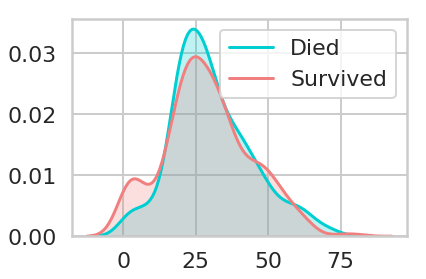

In [16]:
# impact of age
sns.kdeplot(titanic['age'][titanic.survived == 0], color="darkturquoise", shade=True)
sns.kdeplot(titanic['age'][titanic.survived == 1], color="lightcoral", shade=True)
plt.legend(['Died','Survived'])
plt.show()
# As we can see below, there is a pick in kids who survived. most likely people where trying to help them. 


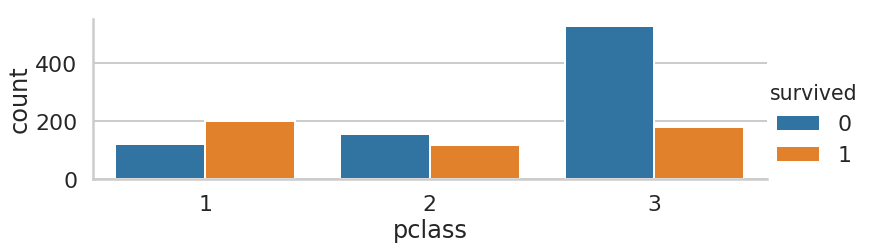

In [14]:
# lets check impact of class on surviving
sns.catplot(x="pclass", hue="survived", data=titanic, kind="count", height=4, aspect=2.7);
plt.show()
# pretty obvious that people in 1st class had much more chance to survive than people in 3rd class

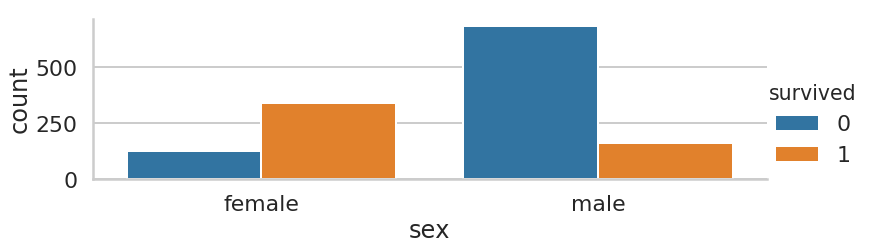

In [18]:
# lets check impact of sex
sns.catplot(x="sex", hue="survived", data=titanic, kind="count", height=4, aspect=2.7);
plt.show()
# please note the 'kind' parameter which allowed as to draw this chart
# interesting. Being women also increase likeliness to survive

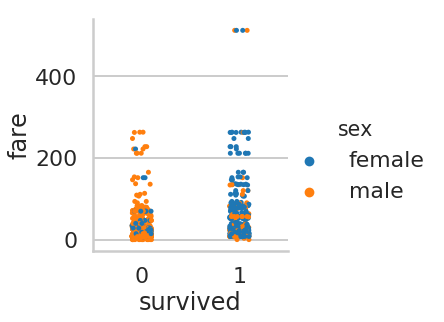

In [20]:
# and 1 more chart. Lets check impact of the price of ticket and sex
sns.catplot(x="survived", y="fare", hue='sex', data=titanic);
# What we can see is that female who died where mainly having low price ticket, which where most likely mainly 3rd calss

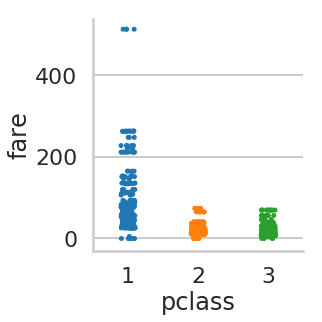

In [21]:
# lets see if price was correlated with class
sns.catplot(x="pclass", y="fare", data=titanic);
# we can see that high price ticket where 1st class

#This is how we get to mind blowing conclusion that being female with expensive ticket (meaning 1st class) was significantly increasing your chance to survive. 

Fortunetly being a kid, as well.

In next part we will use more advanced menthods to find other dependencies and build a predicting model, being able to say what are a chance to survive. 